In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!wget 'kaggle competitions download -c dog-breed-identification'

--2025-07-10 18:01:48--  http://kaggle%20competitions%20download%20-c%20dog-breed-identification/
Resolving kaggle competitions download -c dog-breed-identification (kaggle competitions download -c dog-breed-identification)... failed: Name or service not known.
wget: unable to resolve host address ‘kaggle competitions download -c dog-breed-identification’


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vigneshluffy","key":"753f9338f90496d9c74f253d268a6768"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c dog-breed-identification

 98% 676M/691M [00:02<00:00, 259MB/s]
100% 691M/691M [00:02<00:00, 339MB/s]


In [6]:
!unzip dog-breed-identification.zip -d dog_breed_data

Streaming output truncated to the last 5000 lines.
  inflating: dog_breed_data/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: dog_breed_data/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: dog_breed_data/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: dog_breed_data/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: dog_breed_data/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: dog_breed_data/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: dog_breed_data/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: dog_breed_data/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: dog_breed_data/train/83fad0718581a696132c96c166472627.jpg  
  inflating: dog_breed_data/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: dog_breed_data/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: dog_breed_data/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: dog_breed_data/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  


In [7]:
!unzip dog_breed_data/train.zip -d train_images
!unzip dog_breed_data/test.zip -d test_images

unzip:  cannot find or open dog_breed_data/train.zip, dog_breed_data/train.zip.zip or dog_breed_data/train.zip.ZIP.
unzip:  cannot find or open dog_breed_data/test.zip, dog_breed_data/test.zip.zip or dog_breed_data/test.zip.ZIP.


In [8]:
import os
print(os.listdir())

['.config', 'dog-breed-identification.zip', 'kaggle.json', 'drive', 'dog_breed_data', 'sample_data']


In [9]:
print(os.listdir('dog_breed_data'))

['sample_submission.csv', 'test', 'labels.csv', 'train']


In [10]:
import pandas as pd
label_csv=pd.read_csv("/content/dog_breed_data/labels.csv")
print(label_csv.describe())
print(label_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [11]:
label_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<Axes: xlabel='breed'>

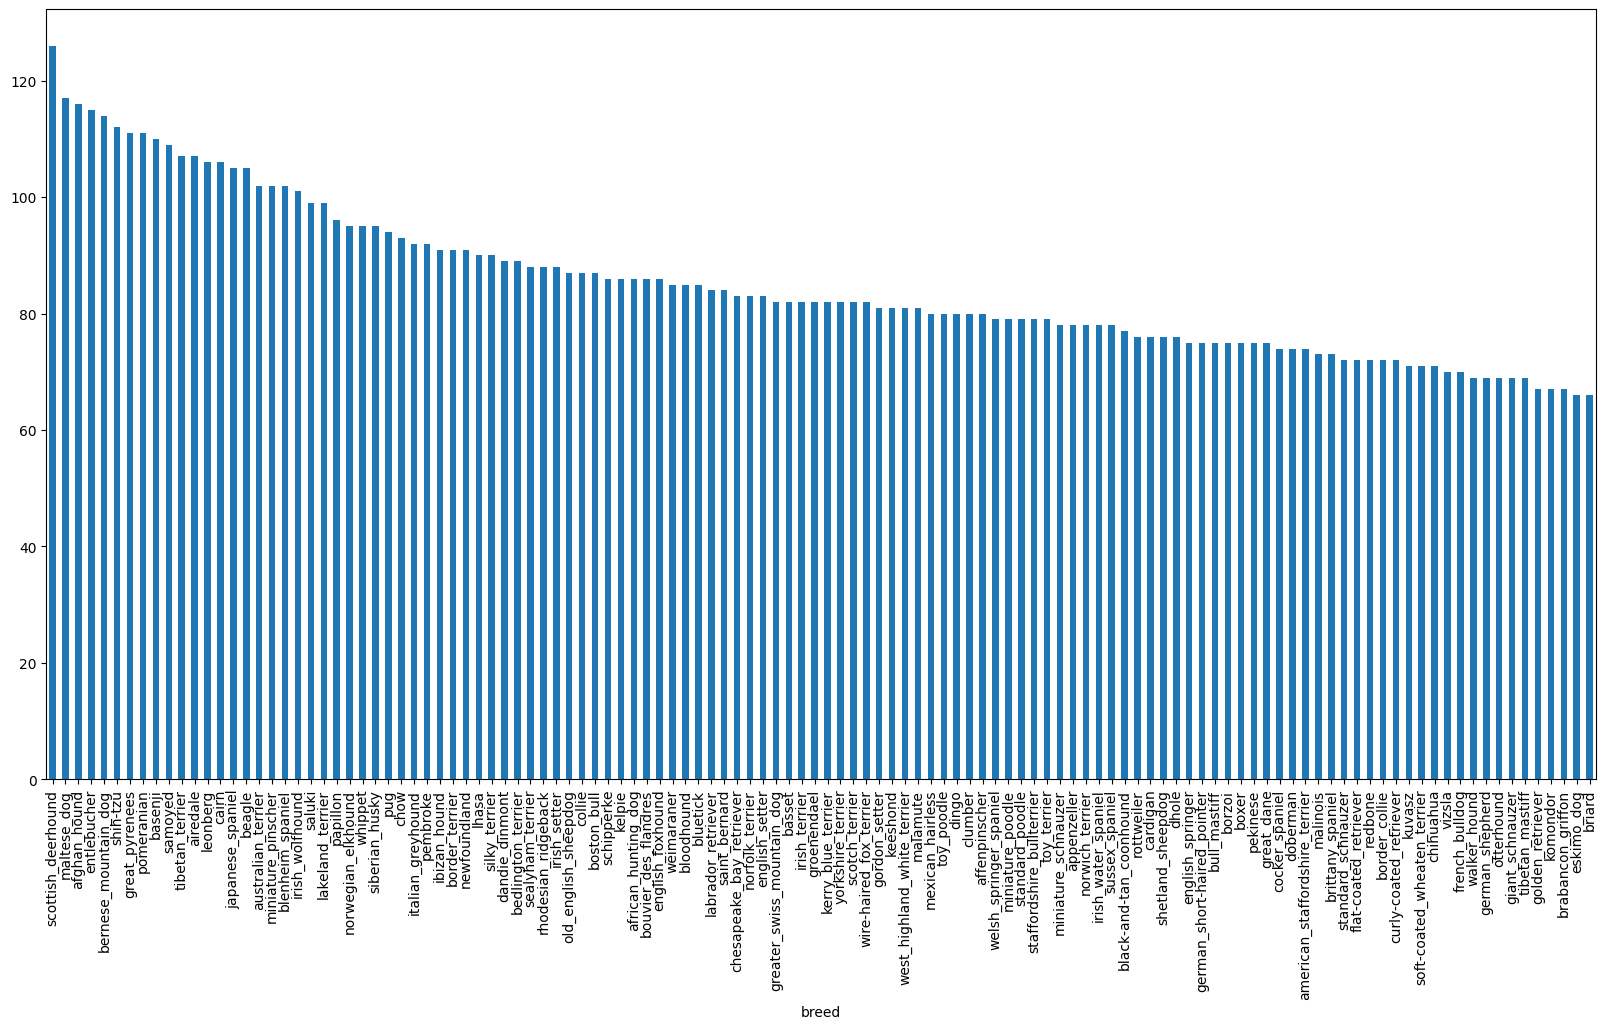

In [12]:
label_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [13]:
label_csv["breed"].value_counts().median()

82.0

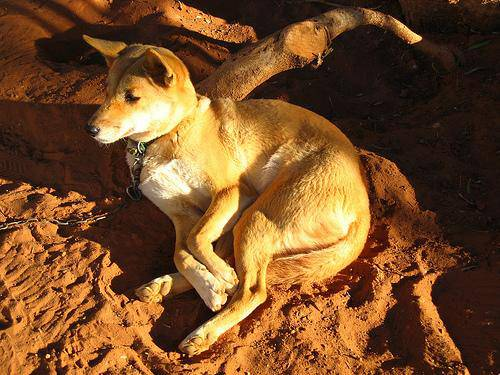

In [14]:
#lets view a Image
from IPython.display import Image
Image("/content/dog_breed_data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [15]:
label_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [16]:
#create pathnames from image ID's
filenames=["/content/dog_breed_data/train/"+fname +".jpg" for fname in label_csv["id"]]

#check the first 10
filenames[:10]

['/content/dog_breed_data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/dog_breed_data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/dog_breed_data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/dog_breed_data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/dog_breed_data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/dog_breed_data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/dog_breed_data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/dog_breed_data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/dog_breed_data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/dog_breed_data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [17]:
#check whether number of filenames matches number of actual image files
import os
if len(os.listdir("/content/dog_breed_data/train/"))==len(filenames):
  print("Filenames match actual amount of files!!! Proceed**")
else:
  print("Again!!!")

Filenames match actual amount of files!!! Proceed**


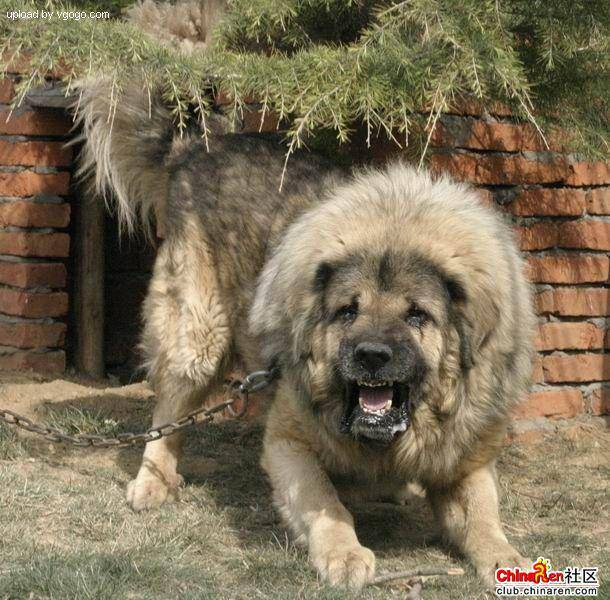

In [18]:
#check
Image(filenames[9000])

In [19]:
label_csv["breed"][9000]

'tibetan_mastiff'

In [20]:
import numpy as np
labels=label_csv["breed"]
labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [21]:
len(labels)

10222

In [22]:
#see if number of labels
if len(labels)==len(filenames):
  print("matches!!!")
else:
  print("Not matches")

matches!!!


In [23]:
unique_breeds=np.unique(labels)
len(unique_breeds)

120

In [24]:
#Turn every label into a boolean array
boolean_labels=[label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [25]:
len(boolean_labels)

10222

In [26]:
#Turning a boolean array into integer
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [27]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [28]:
filenames[:10]

['/content/dog_breed_data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/dog_breed_data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/dog_breed_data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/dog_breed_data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/dog_breed_data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/dog_breed_data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/dog_breed_data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/dog_breed_data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/dog_breed_data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/dog_breed_data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [29]:
#CREATING OUR OWN VALIDATION DATASET
#set up x& y variables
x=filenames
y=boolean_labels

In [30]:
#set number of images to use for experimenting
NUM_IMAGES=3000 #@param {type:"slider",min:1000,max:10000,step:1000}

In [31]:
#let split our data into train and validation sets
from sklearn.model_selection import train_test_split

#split them into training and validation of total size NUM_IMAGES
x_train,x_val,y_train,y_val=train_test_split(x[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)

len(x_train),len(y_train),len(x_val),len(y_val)

(2400, 2400, 600, 600)

In [32]:
#verify training data
x_train[:2],y_train[:2]

(['/content/dog_breed_data/train/0fb1454104deee316f52244bb2037b37.jpg',
  '/content/dog_breed_data/train/113ef2bb9e14d89f927314f73d573313.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False,  True, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False

In [33]:
#convert image to numpy array
from matplotlib.pyplot import imread
image=imread(filenames[42])
image.shape

(257, 350, 3)

In [34]:
image.max(),image.min()

(np.uint8(255), np.uint8(0))

In [35]:
import tensorflow as tf
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

In [36]:
# Define image size
IMG_SIZE=224

#These all helps in normalization
#create a function for preprocessing images
def process_images(image_path,img_size=IMG_SIZE):
  #read in an image file
  image=tf.io.read_file(image_path)
  #Turn the jpeg image into numerical Tensor with 3 colour channels (Red ,Green, Blue)
  image=tf.image.decode_jpeg(image,channels=3)
  #convert the colour channel values 0-255 to 0-1
  image=tf.image.convert_image_dtype(image,tf.float32)
  #Resize the image to our desired value(244,244)
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image

In [37]:
#Function to return a tuple
def get_image_label(image_path,label):
  image=process_images(image_path)
  return image,label

In [38]:
(process_images(x[42],tf.constant(y[42])))

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.3264178 , 0.5222886 , 0.3232816 ],
        [0.2537167 , 0.44366494, 0.24117759],
        [0.25699762, 0.4467087 , 0.23893751],
        ...,
        [0.29325107, 0.5189916 , 0.3215547 ],
        [0.29721776, 0.52466875, 0.33030328],
        [0.2948505 , 0.5223015 , 0.33406618]],

       [[0.25903144, 0.4537807 , 0.27294815],
        [0.24375686, 0.4407019 , 0.2554778 ],
        [0.2838985 , 0.47213382, 0.28298813],
        ...,
        [0.2785345 , 0.5027992 , 0.31004712],
        [0.28428748, 0.5108719 , 0.32523635],
        [0.28821915, 0.5148036 , 0.32916805]],

       [[0.20941195, 0.40692952, 0.25792548],
        [0.24045378, 0.43900946, 0.2868911 ],
        [0.29001117, 0.47937486, 0.32247734],
        ...,
        [0.26074055, 0.48414773, 0.30125174],
        [0.27101526, 0.49454468, 0.32096273],
        [0.27939945, 0.5029289 , 0.32934693]],

       ...,

       [[0.00634795, 0.03442048, 0.0258106 ],
        [0.01

In [39]:
# Define batch size
BATCH_SIZE = 32

# Function to create data batches
def create_data_batch(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    if test_data:
        print("Creating the test dataset")
        data = tf.data.Dataset.from_tensor_slices(x)  # x is a list of image paths
        data_batch = data.map(lambda image_path: process_images(image_path))
        return data_batch.batch(batch_size)

    elif valid_data:
        print("Creating the validation dataset")
        data = tf.data.Dataset.from_tensor_slices((x, y))
        data_batch = data.map(get_image_label)
        return data_batch.batch(batch_size)

    else:
        print("Creating the training data batches")
        data = tf.data.Dataset.from_tensor_slices((x, y))
        data = data.shuffle(buffer_size=len(x))
        data = data.map(get_image_label)
        return data.batch(batch_size)


In [40]:
#creating the training data and validation data
train_data=create_data_batch(x_train,y_train)
val_data=create_data_batch(x_val,y_val,valid_data=True)

Creating the training data batches
Creating the validation dataset


In [41]:
#check out the different attributes of our data batches
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [42]:
import matplotlib.pyplot as plt

#Creating the fucntion to show the first 25 images
def show_25_image(images,labels):
  plt.figure(figsize=(10,10))

  for i in range(25):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

In [43]:
train_images,train_labels=next(train_data.as_numpy_iterator())
len(train_images),len(train_labels)

(32, 32)

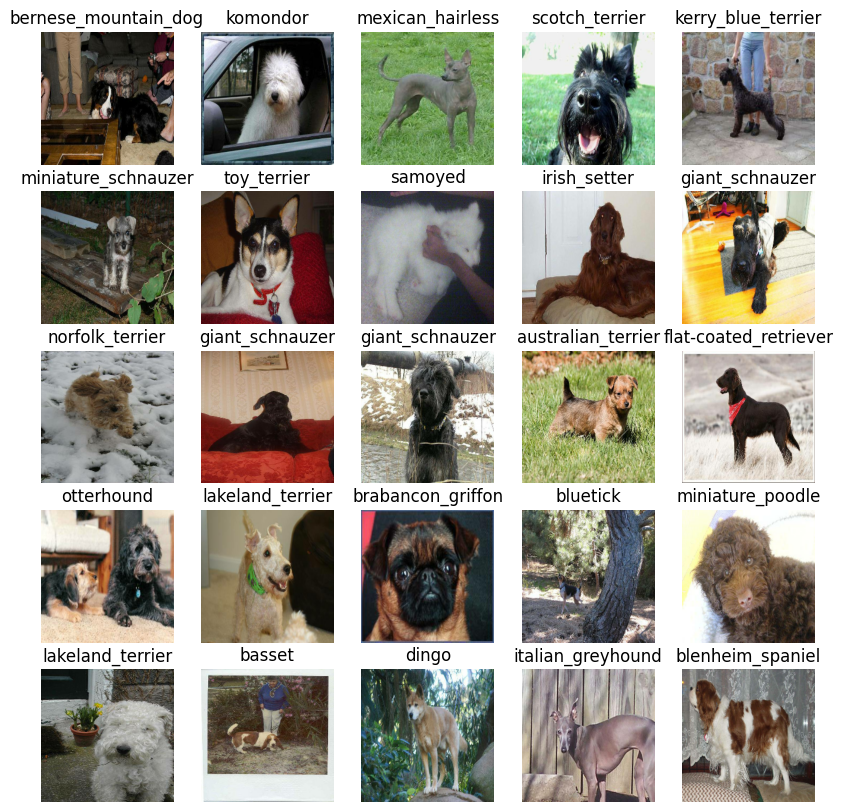

In [44]:
#Now let's visualize the image
show_25_image(train_images,train_labels)

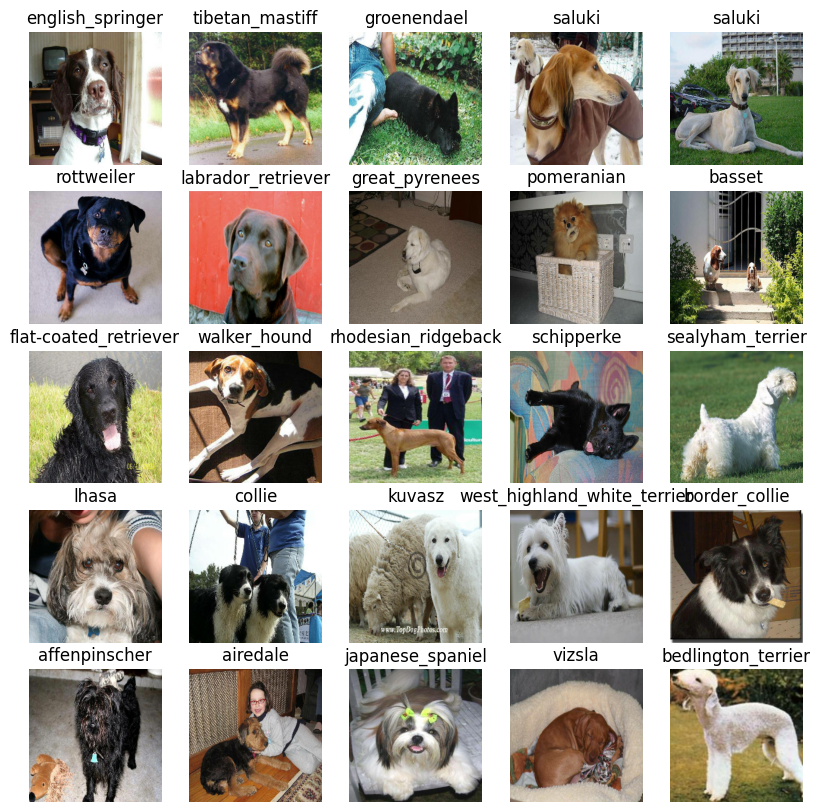

In [45]:
#visualize the validation set
val_images,val_labels=next(val_data.as_numpy_iterator())
show_25_image(val_images,val_labels)

In [46]:
IMG_SIZE=224
#Setup the input shape
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]
#Setup the output shape
OUTPUT_SHAPE=len(unique_breeds)
#setup model URL from TensorFlow
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"

In [47]:
import tensorflow as tf
import tensorflow_hub as hub

In [48]:
import tensorflow as tf
import tensorflow_hub as hub

IMG_SIZE = 224
OUTPUT_SHAPE = len(unique_breeds)
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"

# Custom wrapper to avoid symbolic tensor issue
class CustomHubLayer(tf.keras.layers.Layer):
    def __init__(self, model_url, trainable=False):
        super().__init__()
        self.model = hub.KerasLayer(model_url, trainable=trainable)

    def call(self, inputs):
        return self.model(inputs)

def build_model():
    print("Building model using MobileNetV2 feature extractor (safe wrapper)...")

    inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3), dtype=tf.float32)

    # Use the safe custom wrapper
    x = CustomHubLayer(MODEL_URL, trainable=False)(inputs)

    outputs = tf.keras.layers.Dense(OUTPUT_SHAPE, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model


In [49]:
!pip show tensorflow
!pip show tensorflow-hub


Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras
Name: tensorflow-hub
Version: 0.16.1
Summary: TensorFlow Hub is a library to foster the publication, discovery, and consumption of reusable parts of machine learning models.
Home-page: https://github.com/tensorflow/hub
Author: Google LLC
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, protobuf, tf-keras
Requir

In [50]:
model = build_model()
model.summary()


Building model using MobileNetV2 feature extractor (safe wrapper)...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_hub_layer                │ (None, 1280)           │             0 │
│ (CustomHubLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │       153,720 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153,720 (600.47 KB)

 Trainable params: 153,720 (600.47 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
##Creating callbacks
#Load the TensorBoard notebook extension
%load_ext tensorboard

In [52]:
import datetime

#Create the function to build the TensorBoard callback
def create_tensorboard_callback():
  #Create the log directory for storing Tensorboard logs
  logdir=os.path.join("/content/dog_breed_data",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [53]:
#creating the early stopping call back
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                patience=3)

In [54]:
NUM_EPOCHS=100 #@param{type:"slider",min:10,max:100,step:10}

In [55]:
def train_model():
  #create the  model
  model=build_model()

  #Create new Tensorboard session everytime we train a model
  tensorboard=create_tensorboard_callback()

  #Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])
  #return the fitted model
  return model

In [56]:
#fit the model to the data
model=train_model()

Building model using MobileNetV2 feature extractor (safe wrapper)...
Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.1992 - loss: 3.9087 - val_accuracy: 0.6750 - val_loss: 1.4271
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.8390 - loss: 0.8175 - val_accuracy: 0.7617 - val_loss: 0.9717
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.9457 - loss: 0.3837 - val_accuracy: 0.7733 - val_loss: 0.8463
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9800 - loss: 0.2381 - val_accuracy: 0.7850 - val_loss: 0.7988
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.9869 - loss: 0.1652 - val_accuracy: 0.7767 - val_loss: 0.7825
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.9988 - loss: 0.1131 - val_accuracy: 0.7850 - val_loss: 0.7553
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.9991 - loss: 0.0883 - val_accuracy: 0.7883 - val_loss: 0.7418
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━

In [57]:
#Make the predictions on the validation dat
predictions=model.predict(val_data,verbose=1)
predictions

19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step


array([[2.0459270e-06, 8.6565296e-06, 5.5614328e-06, ..., 2.7219194e-04,
        3.5915907e-06, 1.0176372e-05],
       [5.8493391e-05, 1.0196404e-05, 2.4226196e-05, ..., 4.2337587e-07,
        2.1768899e-06, 2.3983077e-05],
       [1.5725112e-05, 1.8194696e-05, 1.8967219e-05, ..., 1.6947050e-05,
        1.9225695e-07, 1.4528186e-05],
       ...,
       [4.5254668e-03, 9.1789085e-03, 1.1292403e-04, ..., 1.9587041e-03,
        5.8841217e-02, 3.5909200e-04],
       [1.4577797e-06, 1.9257270e-06, 1.2757395e-06, ..., 8.1675127e-05,
        8.9801918e-04, 4.8011057e-06],
       [2.1910933e-05, 6.1451406e-06, 3.9163820e-05, ..., 1.2437640e-03,
        1.2542974e-05, 1.2359977e-05]], dtype=float32)

In [ ]:
predictions.shape

In [59]:
#First prediction
index=35
print(predictions[index])
print(f"Max value (probability of prediction):{np.max(predictions[index])}")
print(f"sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted Label: {unique_breeds[np.argmax(predictions[index])]}")

[7.0809506e-07 3.0451711e-05 9.9628180e-01 2.9520413e-07 1.8111663e-06
 7.3309438e-06 7.5624229e-07 2.2032162e-05 4.0455329e-06 8.8029606e-07
 2.6906353e-06 9.3478349e-07 6.3513136e-07 8.2917279e-07 5.5915444e-07
 9.5065319e-05 5.5865953e-06 1.0966040e-06 2.0415137e-04 1.2413236e-05
 3.9918609e-07 2.9733721e-06 1.4908894e-06 1.9638476e-06 2.4838465e-07
 1.1232668e-06 4.6888579e-07 1.6602115e-05 3.7408299e-07 1.8655313e-05
 1.4021225e-07 7.8960568e-07 7.3247165e-08 3.5875562e-06 8.6362940e-07
 6.1862124e-07 1.3988398e-03 7.2274786e-05 7.4478308e-08 2.3675875e-06
 3.3377764e-06 1.6693180e-07 1.6547769e-05 7.1742129e-06 5.1678699e-06
 4.6353009e-07 2.0938858e-05 8.0461550e-06 1.4141305e-07 5.9857848e-06
 1.7309865e-06 9.9294572e-05 7.0961750e-07 1.4452800e-06 4.6613827e-06
 1.1518558e-04 3.0968417e-07 7.9586016e-07 3.0755755e-06 3.9198571e-06
 1.5830368e-05 1.5414181e-06 5.3410104e-06 1.3620017e-05 9.1904997e-07
 8.6482416e-08 5.8254286e-06 1.7653115e-07 1.5890826e-07 3.5547525e-06
 1.967

In [60]:
#Turn prediction probabilities into thier respective label
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]

pred_label=get_pred_label(predictions[81])
pred_label

'newfoundland'

In [61]:
#Create a function to unbatch a batch dataset
def unbatchify(data):
  images=[]
  labels=[]
  for image,label in data.unbatch().as_numpy_iterator():
    images.append(image)

    labels.append(unique_breeds[np.argmax(label)])
  return images,labels

#Unbatchify the validation data
val_images,val_labels=unbatchify(val_data)
val_images[0],val_labels[0]

(array([[[0.41326207, 0.41718364, 0.3544385 ],
         [0.36937293, 0.3732945 , 0.31054938],
         [0.38238448, 0.38630605, 0.32356092],
         ...,
         [0.85572916, 0.8988664 , 0.9216594 ],
         [0.81720906, 0.8603463 , 0.8760326 ],
         [0.87009096, 0.9132282 , 0.9289145 ]],
 
        [[0.41238695, 0.41630852, 0.3535634 ],
         [0.40000004, 0.4039216 , 0.34117648],
         [0.40333864, 0.4072602 , 0.3445151 ],
         ...,
         [0.96608555, 0.9984034 , 0.9996638 ],
         [0.937802  , 0.98093927, 0.99544823],
         [0.9232422 , 0.95921254, 0.96534306]],
 
        [[0.41683942, 0.420761  , 0.35801587],
         [0.39275387, 0.39667544, 0.3339303 ],
         [0.4052726 , 0.40919417, 0.34644905],
         ...,
         [0.93628675, 0.9760188 , 0.98673296],
         [0.788624  , 0.8290739 , 0.8393855 ],
         [0.8861353 , 0.92658526, 0.93689686]],
 
        ...,
 
        [[0.3655635 , 0.25968117, 0.2322302 ],
         [0.38517138, 0.279289  , 0.25183

In [62]:
get_pred_label(val_labels[0])

'affenpinscher'

In [63]:
images_=[]
labels=[]

for image,label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels.append(label)
images_[0],labels[0]

(array([[[0.41326207, 0.41718364, 0.3544385 ],
         [0.36937293, 0.3732945 , 0.31054938],
         [0.38238448, 0.38630605, 0.32356092],
         ...,
         [0.85572916, 0.8988664 , 0.9216594 ],
         [0.81720906, 0.8603463 , 0.8760326 ],
         [0.87009096, 0.9132282 , 0.9289145 ]],
 
        [[0.41238695, 0.41630852, 0.3535634 ],
         [0.40000004, 0.4039216 , 0.34117648],
         [0.40333864, 0.4072602 , 0.3445151 ],
         ...,
         [0.96608555, 0.9984034 , 0.9996638 ],
         [0.937802  , 0.98093927, 0.99544823],
         [0.9232422 , 0.95921254, 0.96534306]],
 
        [[0.41683942, 0.420761  , 0.35801587],
         [0.39275387, 0.39667544, 0.3339303 ],
         [0.4052726 , 0.40919417, 0.34644905],
         ...,
         [0.93628675, 0.9760188 , 0.98673296],
         [0.788624  , 0.8290739 , 0.8393855 ],
         [0.8861353 , 0.92658526, 0.93689686]],
 
        ...,
 
        [[0.3655635 , 0.25968117, 0.2322302 ],
         [0.38517138, 0.279289  , 0.25183

In [64]:
get_pred_label(labels[0])

'english_springer'

In [65]:
get_pred_label(predictions[0])

'english_springer'

In [66]:
def plot_pred(prediction_probabilities,labels,images,n=1):
  pred_prob,true_label,image=prediction_probabilities[n],labels[n],images[n]

  #get the pred label
  pred_label=get_pred_label(pred_prob)

  if pred_label == true_label:
    color="green"
  else:
    color="red"

  #plot the image
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  #change plot title
  plt.title("{} {:2.0f} {}".format(pred_label,np.max(pred_prob)*100,
                                   true_label),color=color)

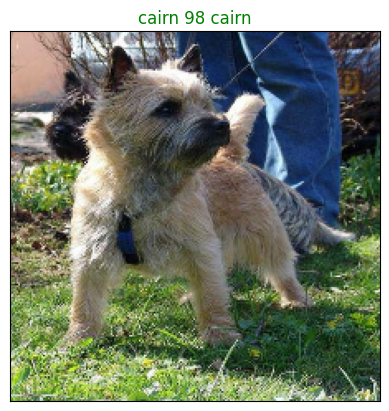

In [67]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

In [68]:
def plot_pred_conf(prediction_probabilities,labels,n=1):
  pred_prob,true_label=prediction_probabilities[n],labels[n]

  #Get the predicted label
  pred_label=get_pred_label(pred_prob)
  #Find the top 10 prediction confidence indexes
  top_10_pred_indexes=pred_prob.argsort()[-10:][::-1]
  #Find the top 10 prediction confidence values
  top_10_pred_values=pred_prob[top_10_pred_indexes]
  #find the top10 prediction labels
  top_10_pred_labels=unique_breeds[top_10_pred_indexes]

  #Setup the plot
  top_plot=plt.bar(np.arange(len(top_10_pred_labels)),top_10_pred_values,color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,rotation="vertical")

  #Change color of true label
  if np.isin(true_label,top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels==true_label)].set_color("green")
  else:
    pass

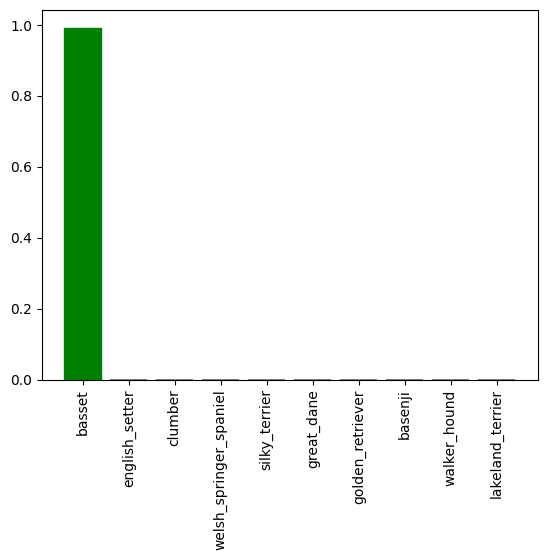

In [69]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

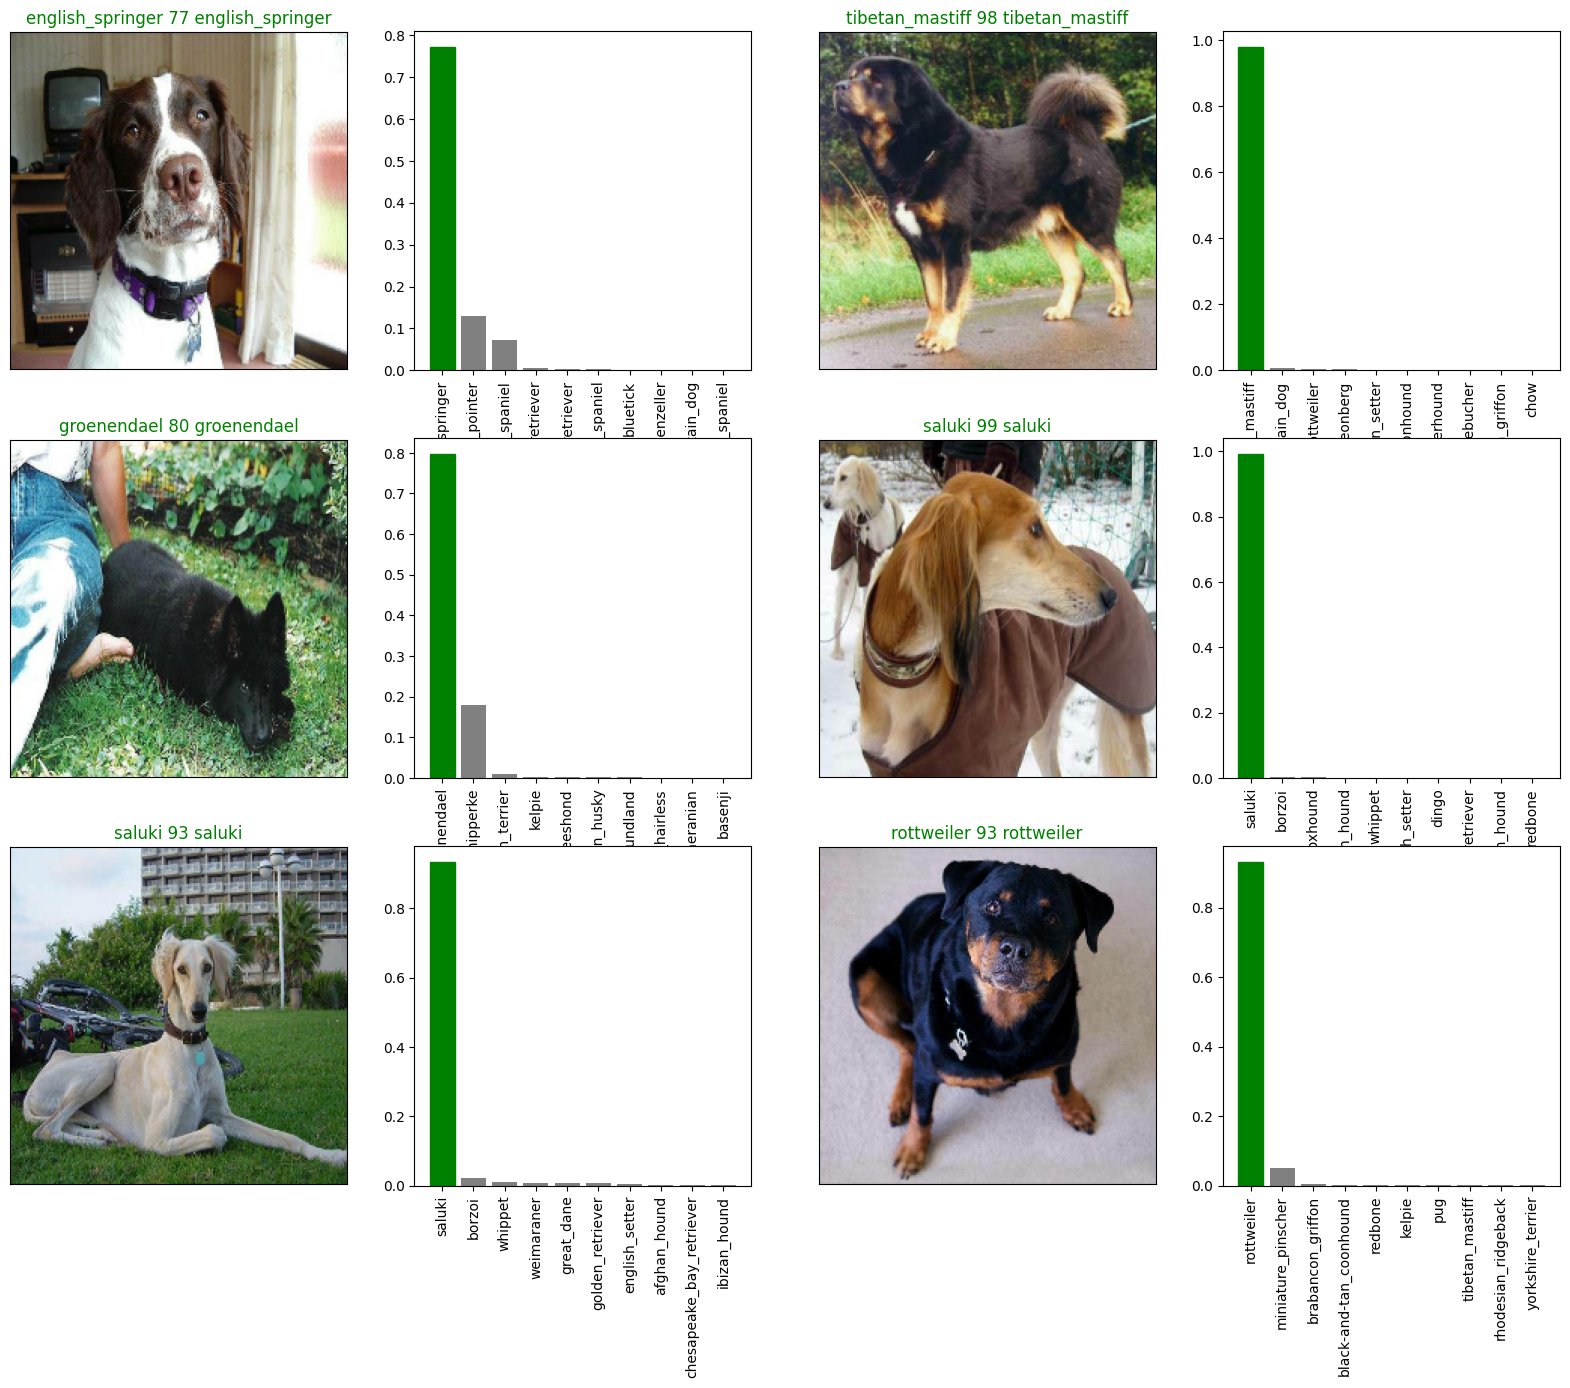

In [70]:
#check the few prediction
i_multiplier=0
num_rows=3
num_cols=2
num_images=num_rows*num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.show()

In [71]:
class CustomHubLayer(tf.keras.layers.Layer):
    def __init__(self, model_url, trainable=False, **kwargs):
        super().__init__(**kwargs)
        self.model_url = model_url
        self.trainable = trainable
        self.model = hub.KerasLayer(model_url, trainable=trainable)

    def call(self, inputs):
        return self.model(inputs)

    def get_config(self):
        config = super().get_config()
        config.update({
            "model_url": self.model_url,
            "trainable": self.trainable
        })
        return config


In [74]:
# ✅ Function to save the model
def save_model(model, suffix="model"):
    model_dir = "/content/dog_breed_data/models"
    os.makedirs(model_dir, exist_ok=True)
    timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    model_path = os.path.join(model_dir, f"{timestamp}-{suffix}.h5")
    print(f"Saving model to: {model_path}...")
    model.save(model_path)
    return model_path

# ✅ Function to load the saved model
def load_model(model_path):
    print(f"Loading saved model from: {model_path}")
    return tf.keras.models.load_model(
        model_path,
        custom_objects={
            "CustomHubLayer": CustomHubLayer,
            "KerasLayer": hub.KerasLayer
        }
    )

In [75]:
#save the model
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: /content/dog_breed_data/models/20250710-183514-1000-images-mobilenetv2-Adam.h5...


'/content/dog_breed_data/models/20250710-183514-1000-images-mobilenetv2-Adam.h5'

In [77]:
def load_custom_model(model_path):
    print(f"Loading saved model from: {model_path}")
    return tf.keras.models.load_model(
        model_path,
        custom_objects={
            "CustomHubLayer": CustomHubLayer,
            "KerasLayer": hub.KerasLayer
        }
    )


In [78]:
import os

os.path.exists("/content/dog_breed_data/models/20250710-163139-1000-images-mobilenetv2-Adam.h5")


False

In [79]:
!ls /content/dog_breed_data/models


20250710-183514-1000-images-mobilenetv2-Adam.h5


In [81]:
from tensorflow.keras.models import load_model as keras_load_model

loaded_1000_image_model = keras_load_model(
    "/content/dog_breed_data/models/20250710-183514-1000-images-mobilenetv2-Adam.h5",
    custom_objects={
        'KerasLayer': hub.KerasLayer,
        'CustomHubLayer': CustomHubLayer
    }
)


In [82]:
model.evaluate(val_data)

19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7967 - loss: 0.7201


[0.7301793694496155, 0.7900000214576721]

In [84]:
loaded_1000_image_model.evaluate(val_data)

19/19 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7967 - loss: 0.7201


[0.7301793694496155, 0.7900000214576721]

In [85]:
len(x),len(y)

(10222, 10222)

In [86]:
#Create the data batches
full_data=create_data_batch(x,y)

Creating the training data batches


In [87]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [88]:
full_model=build_model()

Building model using MobileNetV2 feature extractor (safe wrapper)...


In [89]:
#Create full model callbacks
full_model_tensorboard=create_tensorboard_callback()
#NO validation
full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=3)

In [90]:
#Fit the full model to the full data
full_model.fit(x=full_data,epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 378s 1s/step - accuracy: 0.4971 - loss: 2.3051
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 353s 1s/step - accuracy: 0.8871 - loss: 0.4060
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 386s 1s/step - accuracy: 0.9380 - loss: 0.2585
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 371s 1s/step - accuracy: 0.9651 - loss: 0.1696
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 372s 1s/step - accuracy: 0.9800 - loss: 0.1186
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 349s 1s/step - accuracy: 0.9881 - loss: 0.0918
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 373s 1s/step - accuracy: 0.9927 - loss: 0.0676
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 393s 1s/step - accuracy: 0.9952 - loss: 0.0543
Epoch 9/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 453s 1s/step - accuracy: 0.9982 - loss: 0.0420
Epoch 10/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 395s 1s/step - accuracy: 0.9986 - loss: 0.0344
Epoch 11/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 374s 1s/step - accuracy: 0.9981 - loss: 0.0301
Epoch 12/100
320/320 ━━━━━━━━━

In [91]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to: /content/dog_breed_data/models/20250710-202827-full-image-set-mobilenetv2-Adam.h5...


'/content/dog_breed_data/models/20250710-202827-full-image-set-mobilenetv2-Adam.h5'

In [100]:
from tensorflow.keras.models import load_model

model_path = "/content/dog_breed_data/models/20250710-183514-1000-images-mobilenetv2-Adam.h5"

loaded_full_model = load_model(
    model_path,
    custom_objects={
        'CustomHubLayer': CustomHubLayer,
        'KerasLayer': hub.KerasLayer
    }
)

MAKING PREDICTIONS ON THE TEST DATASET


In [93]:
#Load test image filenames
test_path="/content/dog_breed_data/test/"
test_filenames=[test_path+fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/dog_breed_data/test/d9b0c0bc4de8b19e3452fc477ebdf5a6.jpg',
 '/content/dog_breed_data/test/f8e874d412ff17b33dae7fc7b92f6124.jpg',
 '/content/dog_breed_data/test/909343836968b552d94ebc2835c03805.jpg',
 '/content/dog_breed_data/test/98f5041ffe1940c51bd37128e35ccbfb.jpg',
 '/content/dog_breed_data/test/51170afd34adb78df4b8aeeef909f8e8.jpg',
 '/content/dog_breed_data/test/9d194995dc94f4caa713c7f10675ffcd.jpg',
 '/content/dog_breed_data/test/7bcac4aa90cd8263c408d0bcfdd88398.jpg',
 '/content/dog_breed_data/test/56ccf9b4e3566b5e87dd0a262b294917.jpg',
 '/content/dog_breed_data/test/527c76c29bffd93757cee44abab025f7.jpg',
 '/content/dog_breed_data/test/ab04e38e4e084955f9a2b44ccf04fdae.jpg']

In [94]:
len(test_filenames)

10357

In [95]:
#Create test data batch
test_data=create_data_batch(test_filenames,test_data=True)

Creating the test dataset


In [96]:
test_data


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [97]:
import os

# Keep only paths that exist
valid_test_filenames = [f for f in test_filenames if os.path.exists(f)]

print(f"✅ Valid test images: {len(valid_test_filenames)}")  # Should be > 0


✅ Valid test images: 10357


In [101]:
#Make prediction on test data batch using the loaded full model
test_predictions=loaded_full_model.predict(test_data,verbose=1)

324/324 ━━━━━━━━━━━━━━━━━━━━ 400s 1s/step


In [105]:
import os
os.makedirs("/content/dog_breed_data",exist_ok=True)

In [107]:
#save predictions (Numpyarray) to csv file (for access later)
np.savetxt("/content/dog_breed_data/test_predictions.csv", test_predictions, delimiter=",")



In [108]:
#Load prediction (Numpy array) from csv file
test_predictions=np.loadtxt("/content/dog_breed_data/test_predictions.csv",delimiter=",")

In [109]:
test_predictions[:10]

array([[9.28285735e-05, 1.24030863e-04, 1.96704264e-06, ...,
        4.82181567e-05, 2.41435459e-03, 1.07256301e-05],
       [1.68032435e-04, 3.61235197e-06, 3.08735791e-04, ...,
        1.93103377e-04, 1.83509164e-05, 8.16909087e-05],
       [3.57988961e-06, 1.15610528e-05, 4.12608233e-06, ...,
        3.52956863e-06, 3.00113925e-06, 2.50822973e-06],
       ...,
       [1.03717724e-07, 6.75228603e-06, 6.31733274e-05, ...,
        5.32955267e-02, 2.63598631e-05, 2.15827853e-07],
       [1.55267060e-06, 9.80721772e-01, 1.47327610e-05, ...,
        1.46928287e-05, 2.70216447e-07, 6.09707195e-06],
       [4.73933556e-04, 1.46637880e-03, 1.72878164e-04, ...,
        1.21193525e-05, 2.84684793e-04, 1.07869484e-01]])

In [110]:
test_predictions.shape

(10357, 120)

In [112]:
#Create the pandas dataframe
preds_df=pd.DataFrame(columns=["id"]+list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [118]:
test_ids=[os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"]=test_ids

In [119]:
preds_df.head()

id affenpinscher afghan_hound  \
0  d9b0c0bc4de8b19e3452fc477ebdf5a6           NaN          NaN   
1  f8e874d412ff17b33dae7fc7b92f6124           NaN          NaN   
2  909343836968b552d94ebc2835c03805           NaN          NaN   
3  98f5041ffe1940c51bd37128e35ccbfb           NaN          NaN   
4  51170afd34adb78df4b8aeeef909f8e8           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [120]:
preds_df[list(unique_breeds)]=test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  d9b0c0bc4de8b19e3452fc477ebdf5a6       0.000093      0.000124   
1  f8e874d412ff17b33dae7fc7b92f6124       0.000168      0.000004   
2  909343836968b552d94ebc2835c03805       0.000004      0.000012   
3  98f5041ffe1940c51bd37128e35ccbfb       0.000011      0.000011   
4  51170afd34adb78df4b8aeeef909f8e8       0.000025      0.002959   

   african_hunting_dog  airedale  american_staffordshire_terrier  \
0             0.000002  0.000008                        0.000021   
1             0.000309  0.000001                        0.000393   
2             0.000004  0.000012                        0.000002   
3             0.000013  0.000023                        0.023675   
4             0.000036  0.000111                        0.000001   

    appenzeller  australian_terrier       basenji    basset  ...  toy_poodle  \
0  2.737695e-05            0.000112  1.556031e-05  0.000007  ...    0.000123   
1  8.923433e-06            0.000089  1.046628e-03  0.000183  ...    0.000072   
2  1.969129e-07            0.000060  7.578352e-06  0.000005  ...    0.000012   
3  4.172736e-02            0.000002  4.501495e-03  0.000139  ...    0.000083   
4  3.625491e-07            0.000003  9.443746e-07  0.000001  ...    0.000013   

    toy_terrier        vizsla  walker_hound    weimaraner  \
0  1.605039e-06  5.226166e-07      0.000003  3.855670e-06   
1  4.080562e-02  3.839290e-06      0.000219  1.667186e-06   
2  4.328821e-08  2.154739e-07      0.000001  7.173559e-07   
3  2.414455e-03  9.616792e-06      0.014379  1.043858e-03   
4  4.894158e-07  4.071569e-06      0.000002  1.204679e-05   

   welsh_springer_spaniel  west_highland_white_terrier   whippet  \
0            3.509498e-05                 4.625294e-05  0.000048   
1            6.733654e-06                 2.760679e-05  0.000193   
2            2.008560e-07                 5.637121e-08  0.000004   
3            2.016202e-04                 2.705896e-06  0.041598   
4            4.346993e-07                 4.595990e-06  0.000054   

   wire-haired_fox_terrier  yorkshire_terrier  
0                 0.002414       1.072563e-05  
1                 0.000018       8.169091e-05  
2                 0.000003       2.508230e-06  
3                 0.000089       9.873067e-07  
4                 0.000423       1.221209e-06  

[5 rows x 121 columns]

In [121]:
preds_df.to_csv("/content/dog_breed_data/full_model_predictions_1_mobilenetV2.csv",index=False)

In [127]:
!unzip "/content/dog_breed_data/dog-photos.zip" -d "/content/dog_breed_data/my-dog-photos"

Archive:  /content/dog_breed_data/dog-photos.zip
  inflating: /content/dog_breed_data/my-dog-photos/dog-photo-4.jpeg  
  inflating: /content/dog_breed_data/my-dog-photos/dog-photo-1.jpeg  
  inflating: /content/dog_breed_data/my-dog-photos/dog-photo-2.jpeg  
  inflating: /content/dog_breed_data/my-dog-photos/dog-photo-3.jpeg  


In [128]:
custom_path="/content/dog_breed_data/my-dog-photos/"
custom_images=[custom_path+fname for fname in os.listdir(custom_path)]
custom_images

['/content/dog_breed_data/my-dog-photos/dog-photo-1.jpeg',
 '/content/dog_breed_data/my-dog-photos/dog-photo-2.jpeg',
 '/content/dog_breed_data/my-dog-photos/dog-photo-4.jpeg',
 '/content/dog_breed_data/my-dog-photos/dog-photo-3.jpeg']

In [129]:
#Turn custom images into batches
custom_data=create_data_batch(custom_images,test_data=True)
custom_data

Creating the test dataset


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [130]:
#Make prediction on the custom data
custom_preds=loaded_full_model.predict(custom_data)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


In [131]:
custom_preds

array([[7.21318372e-07, 6.49173535e-06, 4.25775715e-06, 4.34708090e-05,
        4.91773896e-02, 4.31603956e-04, 2.68080272e-04, 8.96486803e-04,
        8.03586445e-04, 8.18241737e-04, 3.27780217e-05, 1.20578952e-04,
        1.03587721e-04, 2.98238738e-05, 1.74057367e-03, 7.25350401e-05,
        5.97298902e-04, 1.25427300e-03, 1.01672777e-03, 2.37695713e-05,
        8.38843562e-07, 1.24555000e-03, 1.27521547e-04, 8.95604080e-06,
        8.12642928e-03, 3.91298719e-03, 7.48345838e-06, 2.27129567e-04,
        2.12968551e-02, 1.30804547e-03, 1.25223410e-03, 7.76159926e-04,
        4.95587767e-04, 5.45851217e-05, 1.22796264e-04, 5.37628715e-04,
        1.24192680e-04, 3.91229289e-03, 8.93421529e-05, 1.91798739e-04,
        1.76461309e-03, 1.94031463e-06, 1.09016204e-04, 1.22565252e-03,
        1.21225436e-04, 1.01856640e-04, 4.07579464e-05, 4.60178475e-04,
        1.44359263e-04, 1.51621982e-01, 1.21379708e-05, 5.11302613e-03,
        3.13375285e-03, 2.77375075e-04, 1.43190700e-05, 5.957443

In [132]:
custom_preds.shape

(4, 120)

In [133]:
#get custom image prediction labels
custom_preds_labels=[get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_preds_labels


['labrador_retriever', 'toy_poodle', 'saluki', 'golden_retriever']

In [134]:
custom_images=[]

for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

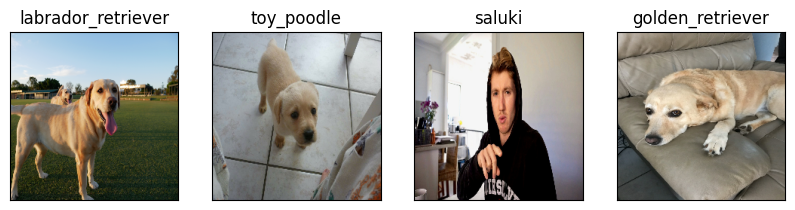

In [135]:
#check custom image prediction
plt.figure(figsize=(10,10))
for i in range(len(custom_images)):
  plt.subplot(1,len(custom_images),i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_preds_labels[i])
  plt.imshow(custom_images[i])
plt.show()